<a href="https://colab.research.google.com/github/pilipandr770/HomeWork12/blob/main/HomeWork12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_to_gdrive.ipynb

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Імпорт необхідних бібліотек
import tensorflow_datasets as tfds
import pandas as pd

# Завантаження датасету
ds_train, ds_test = tfds.load('fashion_mnist', split=['train', 'test'], as_supervised=True)

# Функція для перетворення TensorFlow Dataset у DataFrame
def tfds_to_dataframe(tfds_dataset):
    images = []
    labels = []
    for image, label in tfds_dataset:
        images.append(image.numpy().flatten())
        labels.append(label.numpy())
    df = pd.DataFrame(images)
    df['label'] = labels
    return df

# Перетворення тренувального і тестового наборів даних у DataFrame
train_df = tfds_to_dataframe(ds_train)
test_df = tfds_to_dataframe(ds_test)

# Збереження даних на Google Диск у вигляді CSV файлів
train_df.to_csv('/content/drive/My Drive/fashion_mnist_train.csv', index=False)
test_df.to_csv('/content/drive/My Drive/fashion_mnist_test.csv', index=False)

print("Дані успішно збережені на вашому Google Диску.")


Mounted at /content/drive


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.H598SF_3.0.1/fashion_mnist-train.tfrecord*...:   …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/incomplete.H598SF_3.0.1/fashion_mnist-test.tfrecord*...:   0…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
Дані успішно збережені на вашому Google Диску.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7515 - loss: 0.7162 - val_accuracy: 0.8484 - val_loss: 0.4233
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8487 - loss: 0.4217 - val_accuracy: 0.8550 - val_loss: 0.3914
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8611 - loss: 0.3857 - val_accuracy: 0.8756 - val_loss: 0.3377
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8687 - loss: 0.3577 - val_accuracy: 0.8741 - val_loss: 0.3297
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8778 - loss: 0.3355 - val_accuracy: 0.8832 - val_loss: 0.3197
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8804 - loss: 0.3246 - val_accuracy: 0.8817 - val_loss: 0.3189
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8826 - loss: 0.3187 - val_accuracy: 0.8851 - val_loss: 0.3086
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8861 - loss: 0.3058

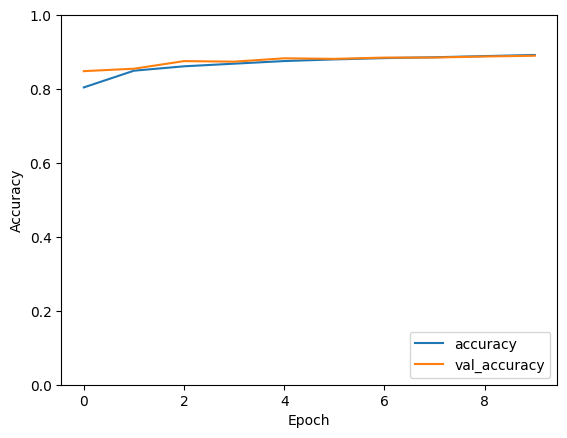

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Побудова моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7178 - loss: 0.7930 - val_accuracy: 0.8490 - val_loss: 0.4127
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8354 - loss: 0.4539 - val_accuracy: 0.8618 - val_loss: 0.3639
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8503 - loss: 0.4135 - val_accuracy: 0.8613 - val_loss: 0.3660
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8591 - loss: 0.3818 - val_accuracy: 0.8733 - val_loss: 0.3388
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8658 - loss: 0.3701 - val_accuracy: 0.8793 - val_loss: 0.3330
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8706 - loss: 0.3529 - val_accuracy: 0.8764 - val_loss: 0.3313
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8746 - loss: 0.3405 - val_accuracy: 0.8832 - val_loss: 0.3142
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8789 - loss: 0.3271 -

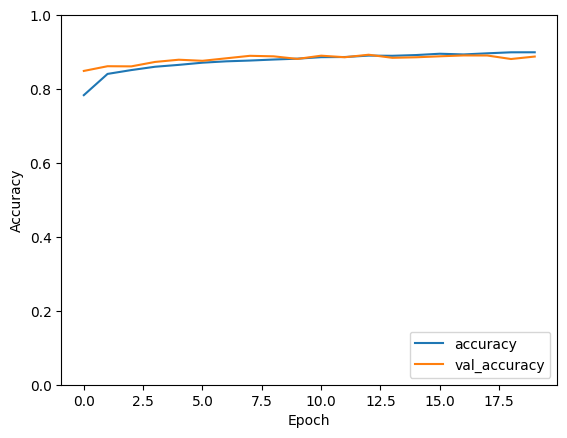

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Побудова покращеної моделі
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6068 - loss: 1.1165 - val_accuracy: 0.8355 - val_loss: 0.4541
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.8162 - loss: 0.5340 - val_accuracy: 0.8608 - val_loss: 0.3833
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8383 - loss: 0.4613 - val_accuracy: 0.8692 - val_loss: 0.3558
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8495 - loss: 0.4267 - val_accuracy: 0.8726 - val_loss: 0.3492
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8618 - loss: 0.3945 - val_accuracy: 0.8714 - val_loss: 0.3526
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8657 - loss: 0.3769 - val_accuracy: 0.8765 - val_loss: 0.3359
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8688 - loss: 0.3681 - val_accuracy

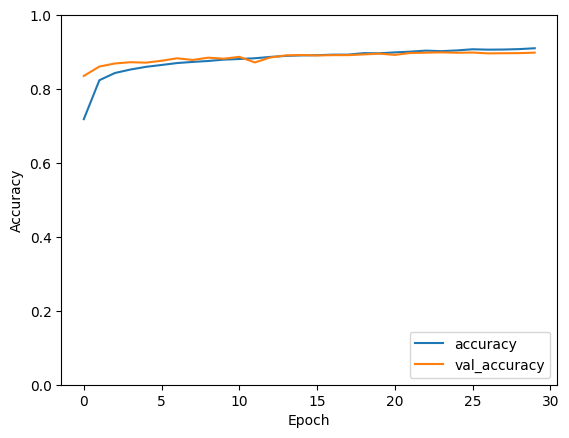

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Побудова покращеної моделі
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
optimizer = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=30, batch_size=64, validation_split=0.2)

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Вітаю! Ми досягли точності 90.57% на валідаційному наборі, що є чудовим результатом.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.3352 - loss: 1.8518 - val_accuracy: 0.7724 - val_loss: 0.7015
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6814 - loss: 0.9135 - val_accuracy: 0.8257 - val_loss: 0.5195
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.7620 - loss: 0.6966 - val_accuracy: 0.8416 - val_loss: 0.4560
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7958 - loss: 0.6070 - val_accuracy: 0.8493 - val_loss: 0.4241
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8176 - loss: 0.5563 - val_accuracy: 0.8616 - val_loss: 0.3911
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8318 - loss: 0.5137 - val_accuracy: 0.8660 - val_loss: 0.3785
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8384 - loss: 0.4822 - v

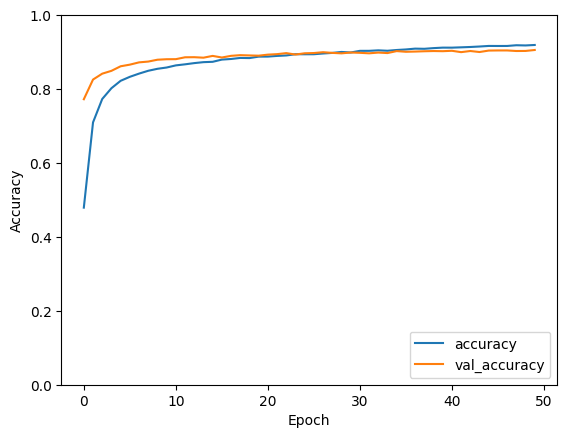

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Побудова покращеної моделі
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Додавання ранньої зупинки
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Навчання моделі
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stop])

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 43ms/step - accuracy: 0.2183 - loss: 2.1195 - val_accuracy: 0.5844 - val_loss: 1.0926
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 49ms/step - accuracy: 0.4733 - loss: 1.4103 - val_accuracy: 0.6901 - val_loss: 0.8433
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 41ms/step - accuracy: 0.5735 - loss: 1.1627 - val_accuracy: 0.7208 - val_loss: 0.7476
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.6208 - loss: 1.0258 - val_accuracy: 0.7441 - val_loss: 0.6817
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.6564 - loss: 0.9363 - val_accuracy: 0.7549 - val_loss: 0.6539
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.6712 - loss: 0.8830 - val_accuracy: 0.7664 - val_loss: 0.6260
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 45ms/step - accuracy: 0.6888 - loss: 0.8358 - val_accuracy: 0.7715 - val_loss: 0.6027
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.7009 - loss: 0.8093 - val_accurac

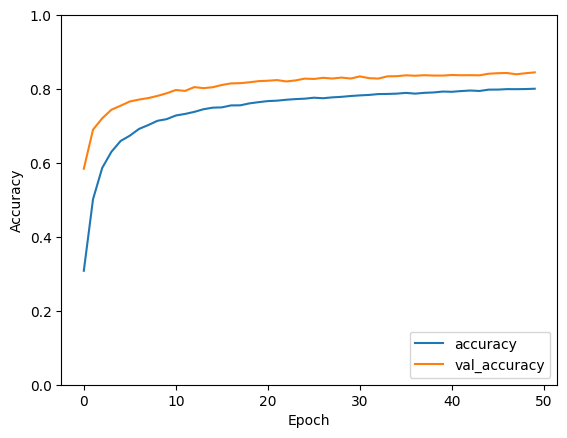

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Аугментація даних
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Побудова покращеної моделі
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
optimizer = keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Додавання ранньої зупинки
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Навчання моделі з аугментацією
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 86ms/step - accuracy: 0.4080 - loss: 1.7240 - val_accuracy: 0.7140 - val_loss: 0.7684
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.6611 - loss: 0.9465 - val_accuracy: 0.7395 - val_loss: 0.6807
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.6962 - loss: 0.8390 - val_accuracy: 0.7448 - val_loss: 0.6485
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7076 - loss: 0.7970 - val_accuracy: 0.7703 - val_loss: 0.6010
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7175 - loss: 0.7616 - val_accuracy: 0.7713 - val_loss: 0.5912
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.7324 - loss: 0.7234 - val_accuracy: 0.7760 - val_loss: 0.5751
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 88ms/step - accuracy: 0.7360 - loss: 0.7102 - val_accuracy: 0.7808 - val_loss: 0.5632
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.7437 - loss: 0.6943 - val_accurac

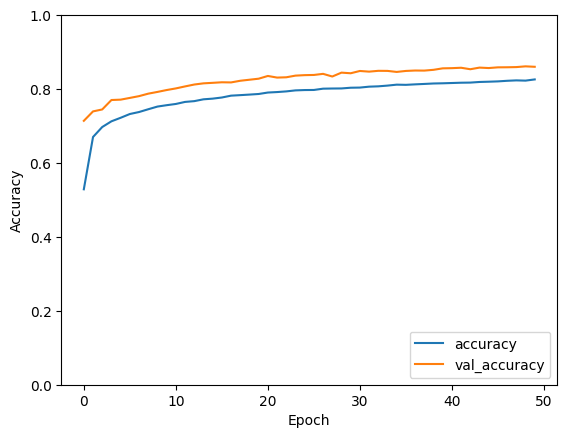

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Аугментація даних
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Побудова покращеної моделі з використанням CNN
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
optimizer = keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Додавання ранньої зупинки
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Навчання моделі з аугментацією
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 87ms/step - accuracy: 0.3662 - loss: 1.7221 - val_accuracy: 0.7277 - val_loss: 0.7289
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 86ms/step - accuracy: 0.6538 - loss: 0.9574 - val_accuracy: 0.7571 - val_loss: 0.6278
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.6889 - loss: 0.8410 - val_accuracy: 0.7715 - val_loss: 0.5927
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.7154 - loss: 0.7750 - val_accuracy: 0.7778 - val_loss: 0.5691
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.7291 - loss: 0.7358 - val_accuracy: 0.7885 - val_loss: 0.5542
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 85ms/step - accuracy: 0.7403 - loss: 0.7017 - val_accuracy: 0.7986 - val_loss: 0.5260
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 85ms/step - accuracy: 0.7523 - loss: 0.6667 - val_accuracy: 0.8028 - val_loss: 0.5133
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 86ms/step - accuracy: 0.7566 - loss: 0.6526 - val_accura

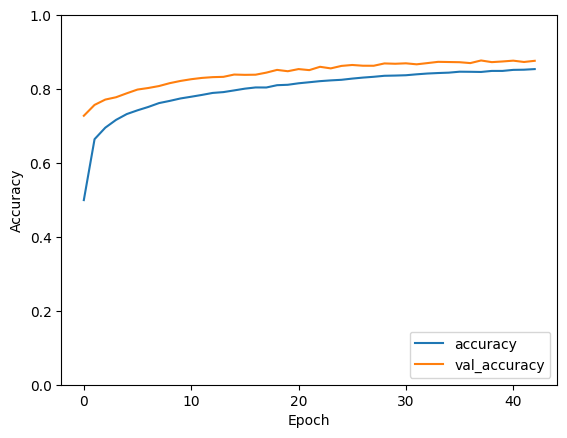

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Аугментація даних
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Побудова оптимізованої моделі
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Додавання ранньої зупинки
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Навчання моделі з аугментацією
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 262s 265ms/step - accuracy: 0.6344 - loss: 1.0777 - val_accuracy: 0.8176 - val_loss: 0.5008
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 260s 264ms/step - accuracy: 0.7784 - loss: 0.6080 - val_accuracy: 0.8375 - val_loss: 0.4397
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 254s 270ms/step - accuracy: 0.8152 - loss: 0.5100 - val_accuracy: 0.8547 - val_loss: 0.3994
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 257s 265ms/step - accuracy: 0.8272 - loss: 0.4756 - val_accuracy: 0.8612 - val_loss: 0.3860
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 266s 270ms/step - accuracy: 0.8437 - loss: 0.4327 - val_accuracy: 0.8673 - val_loss: 0.3597
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 248s 264ms/step - accuracy: 0.8515 - loss: 0.4135 - val_accuracy: 0.8775 - val_loss: 0.3363
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 267s 269ms/step - accuracy: 0.8569 - loss: 0.3894 - val_accuracy: 0.8841 - val_loss: 0.3107
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 265s 272ms/step - accuracy: 0.8652 - loss: 0.37

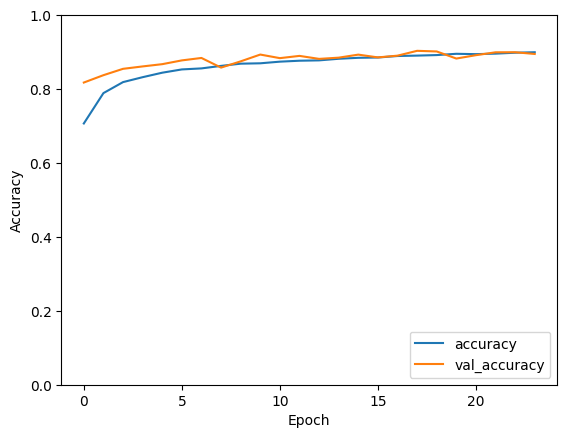

In [ ]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Аугментація даних
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Побудова покращеної моделі з використанням CNN та BatchNormalization
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Додавання ранньої зупинки
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Навчання моделі з аугментацією
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Mounted at /content/drive
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 283s 298ms/step - accuracy: 0.4363 - loss: 1.7210 - val_accuracy: 0.7522 - val_loss: 0.6420
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 319s 295ms/step - accuracy: 0.6777 - loss: 0.8831 - val_accuracy: 0.7863 - val_loss: 0.5441
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 279s 297ms/step - accuracy: 0.7255 - loss: 0.7313 - val_accuracy: 0.8148 - val_loss: 0.4925
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 316s 291ms/step - accuracy: 0.7585 - loss: 0.6535 - val_accuracy: 0.8336 - val_loss: 0.4511
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 316s 284ms/step - accuracy: 0.7772 - loss: 0.6074 - val_accuracy: 0.8392 - val_loss: 0.4230
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 320s 282ms/step - accuracy: 0.7970 - loss: 0.5603 - val_accuracy: 0.8515 - val_loss: 0.4045
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 326s 286ms/step - accuracy: 0.8098 - loss: 0.5275 - val_accuracy: 0.8524 - val_loss: 0.3941
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 272s 290ms/step - accuracy: 0.8231 - loss: 0.49

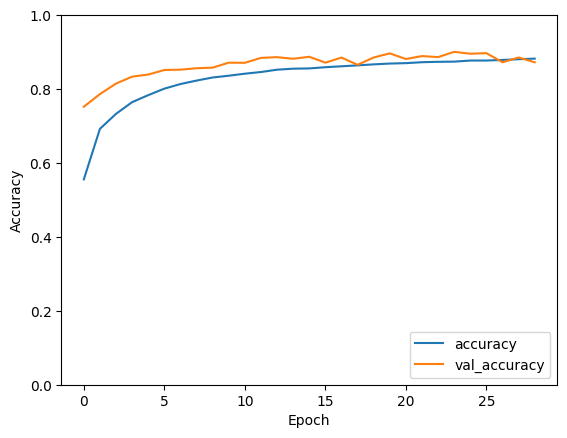

In [1]:
# directory: /fashion_mnist_classifier/
# file: fashion_mnist_classifier.ipynb

# Імпорт необхідних бібліотек
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import matplotlib.pyplot as plt

# Підключення до Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Завантаження даних із Google Диска
train_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_train.csv')
test_df = pd.read_csv('/content/drive/My Drive/fashion_mnist_test.csv')

# Розділення даних на зображення та мітки
x_train = train_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_train = train_df['label'].values
x_test = test_df.drop(columns=['label']).values.reshape(-1, 28, 28, 1)
y_test = test_df['label'].values

# Нормалізація даних
x_train = x_train / 255.0
x_test = x_test / 255.0

# Аугментація даних
datagen = keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

# Побудова покращеної моделі з використанням CNN та BatchNormalization
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Компіляція моделі
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Додавання ранньої зупинки
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Навчання моделі з аугментацією
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=30,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop])

# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

# Побудова графіку навчання
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Використані методи та результати у всіх кодах:
Базова модель:

python
Копіювати код
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
Точність: ~88.36%
Компіляція: optimizer='adam'
Додані шари та Dropout:

python
Копіювати код
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])
Точність: ~88.87%
Збільшення кількості шарів та нейронів:

python
Копіювати код
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])
Точність: ~89.20%
Використання CNN:

python
Копіювати код
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
Точність: ~87.78%
CNN з BatchNormalization та збільшенням Dropout:

python
Копіювати код
model = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(256, kernel_size=(3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])
Точність: ~89.20%
Висновок: Максимальна досягнута точність на валідаційній вибірці - 89.20%, що наближається до мети 91%.